In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# Importer vos fonctions personnalisées
from pipeline import encode_categorical, select_kbest_columns, count_plot_affichage, box_plot_affichage


df = pd.read_csv("../db/data.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
print("LES INFORMATIONS SUR LES DONNEES")
print("="*60)
df.info()

LES INFORMATIONS 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLev

In [ ]:
print("SIZE")
print("="*60)
df.shape


ANALYSE DU SIZE DU DATAFRAME


(1470, 35)

In [ ]:
print("DESCRIPTION STATISTIQUE")
print("="*60)
df.describe()

LA DESCRIPTION STATISTIQUE


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
print("ANALYSE DES VALEURS MANQUANTES")
print("="*60)
missing = df.isnull().sum()


# if missing.sum() == 0:
#     print("Aucune valeur manquante !")
# else:
#     print(missing[missing > 0])    

ANALYSE DES VALEURS MANQUANTES
Aucune valeur manquante !


In [ ]:
print("ANALYSE DE LA VARIABLE CIBLE: ATTRITION")
print("="*60)

attrition_counts = df['Attrition'].value_counts()
print(attrition_counts)

print(f"\nTaux d'attrition: {(attrition_counts['Yes'] / len(df)) * 100:.2f}%")
print(f"Yes/No: 1:{attrition_counts['No'] / attrition_counts['Yes']:.2f}")

# Déséquilibre des classes
if attrition_counts['Yes'] / attrition_counts['No'] < 0.3:
    print("Classes déséquilibrées")
else:
    print("Classes équilibrées")

ANALYSE DE LA VARIABLE CIBLE: ATTRITION
Attrition
No     1233
Yes     237
Name: count, dtype: int64

Taux d'attrition: 16.12%
Yes/No: 1:5.20
Classes déséquilibrées


In [ ]:
print("\nANALYSE DES VARIABLES DUPLIQUÉES")
print("="*60)
duplicates = df.duplicated().sum()
print(f"Nombre de lignes dupliquées: {duplicates}")


ANALYSE DES VARIABLES DUPLIQUÉES
Nombre de lignes dupliquées: 0


In [ ]:
print("PARTIE 2 : NETTOYAGE DES DONNEES")
print("="*60)

df_copy = df.copy()

# Supprimer les colonnes inutiles
df_copy.drop(
    ['EmployeeNumber', 'EmployeeCount', 'Over18', 'StandardHours'],
    axis=1,
    inplace=True
)

['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


## PARTIE 3 : Visualisations

['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']


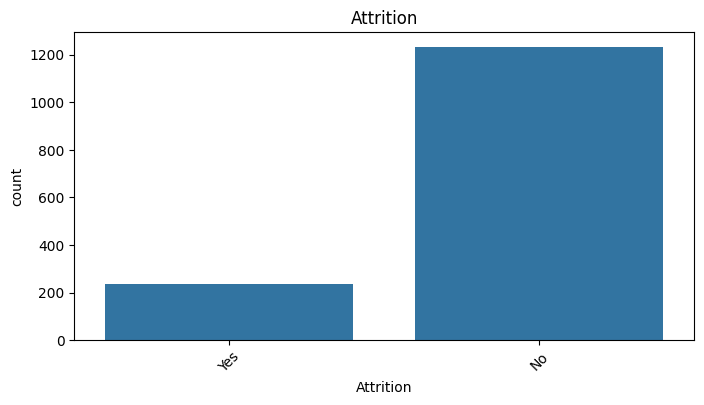

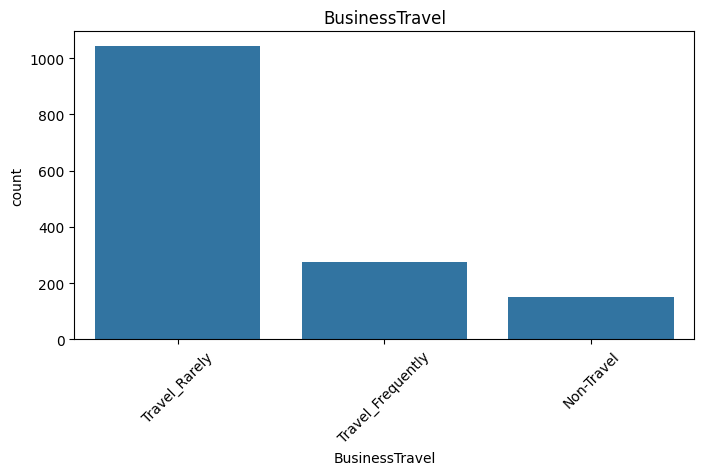

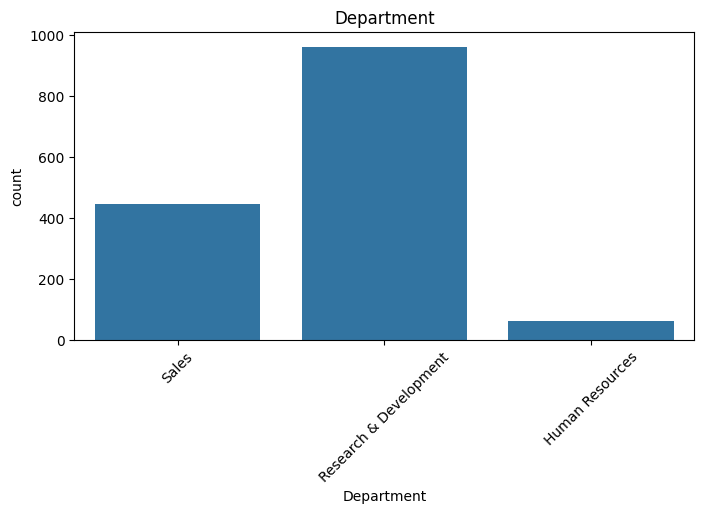

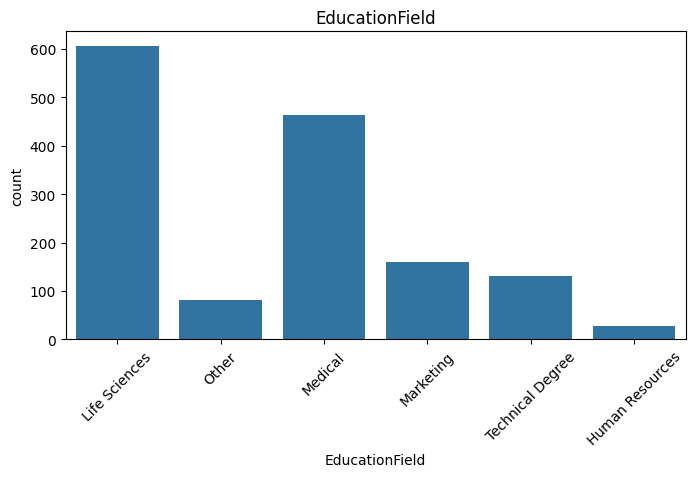

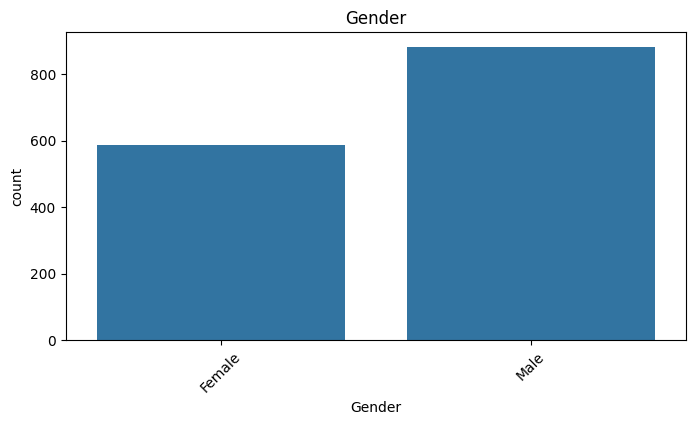

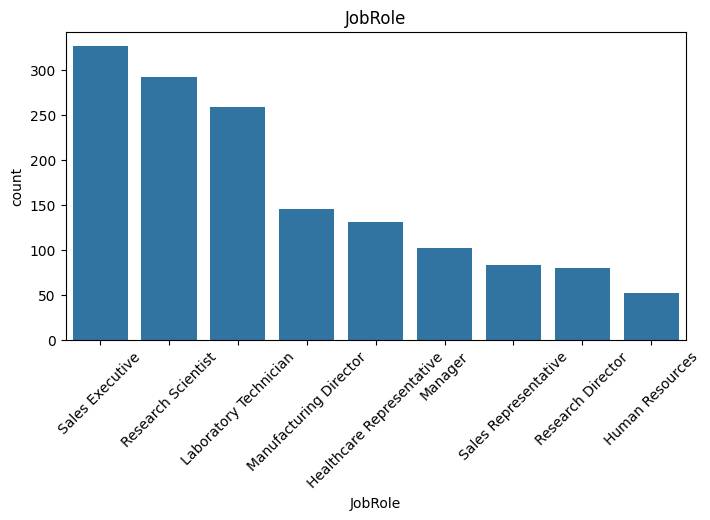

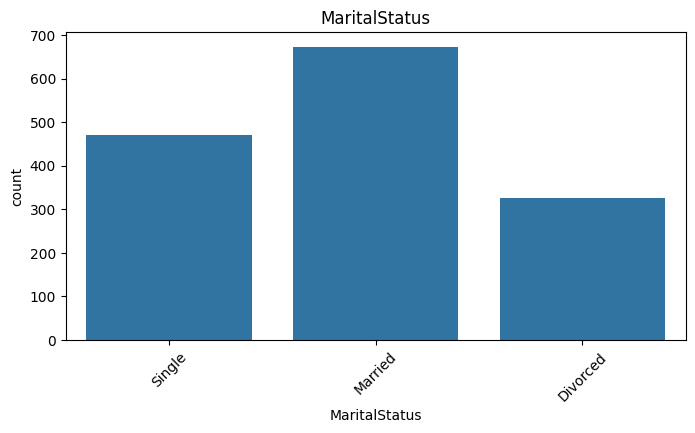

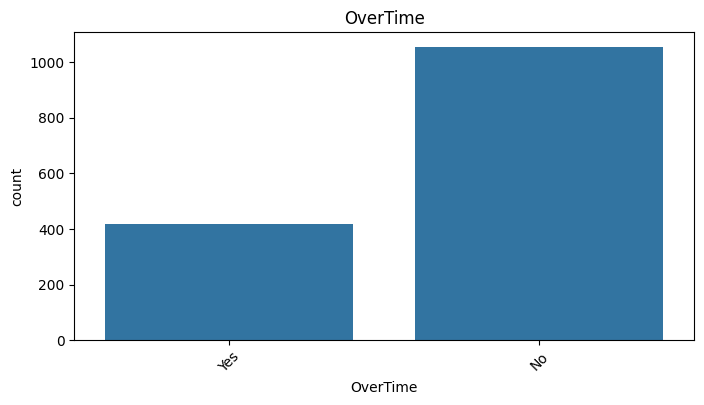

In [ ]:
from pipeline import count_plot_affichage

print("PARTIE 3 : VISUALISATIONS")
print("="*60)


# Sélection des colonnes catégorielles
print("Generation des countplots pour variables categorielles")
categorical_columns = df_copy.select_dtypes(include=['object']).columns.tolist()
print(f"Variables categorielles : {categorical_columns}")


# Affichage des countplots
for col in categorical_columns:
    count_plot_affichage(df_copy, col)

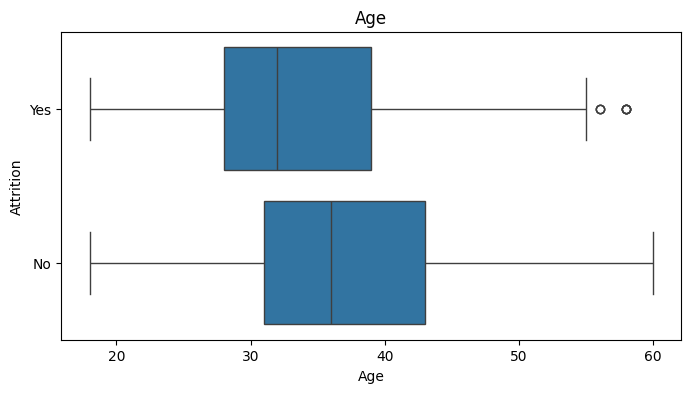

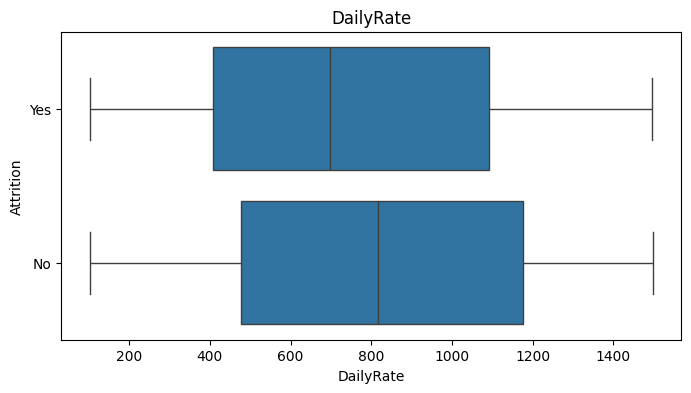

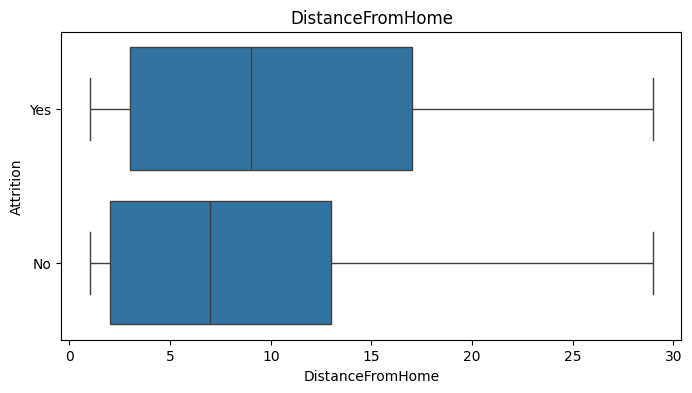

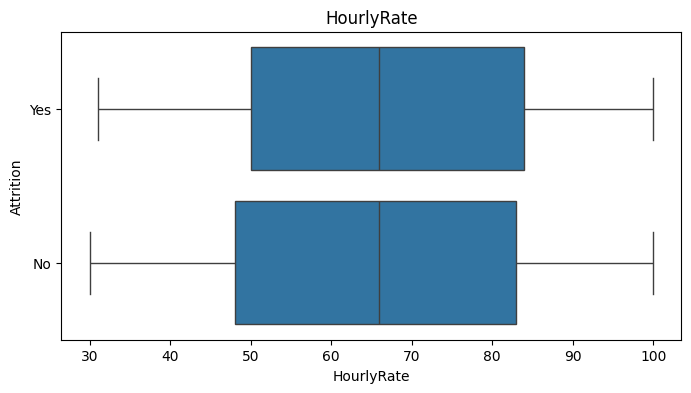

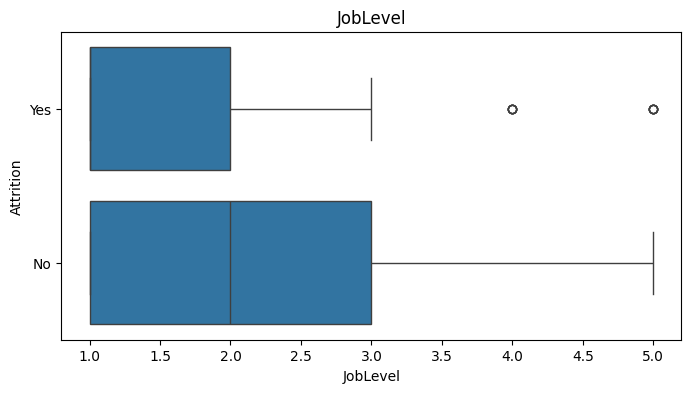

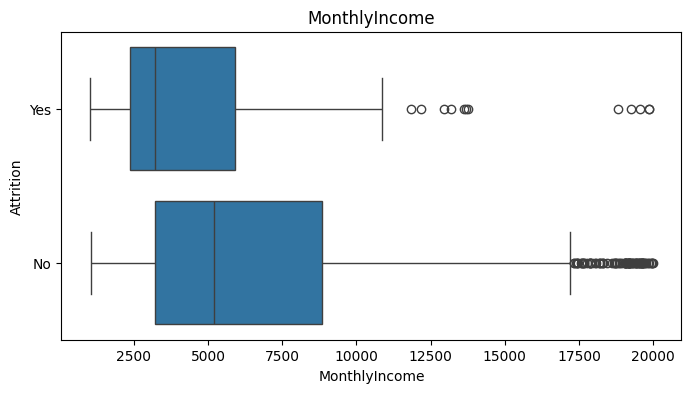

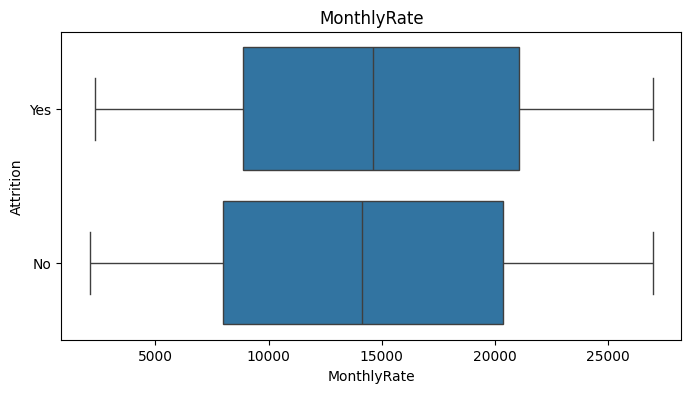

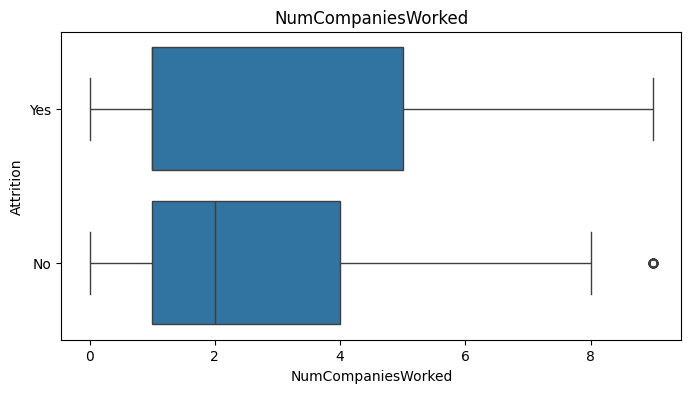

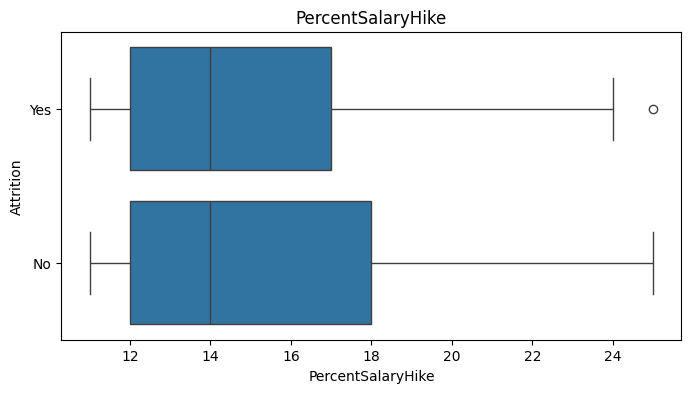

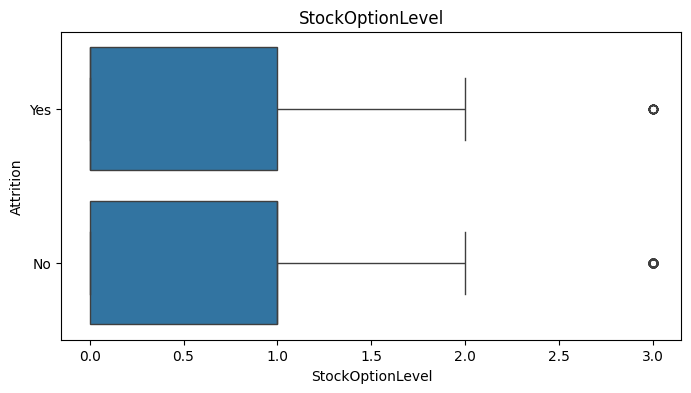

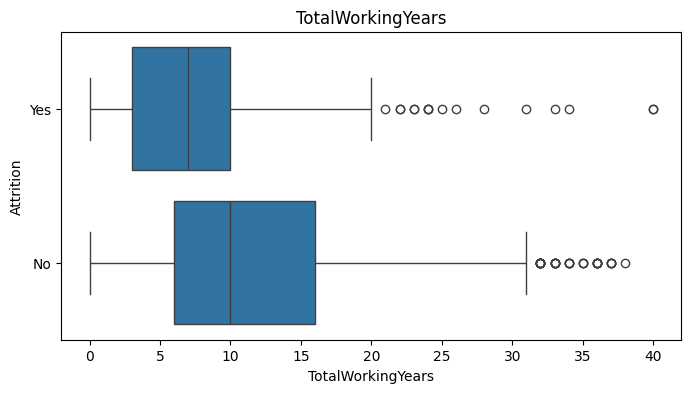

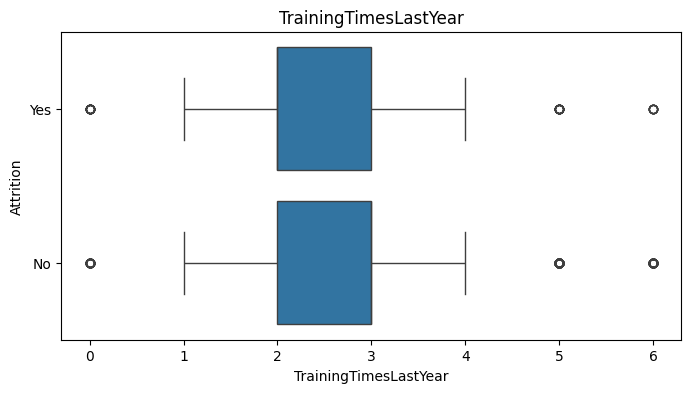

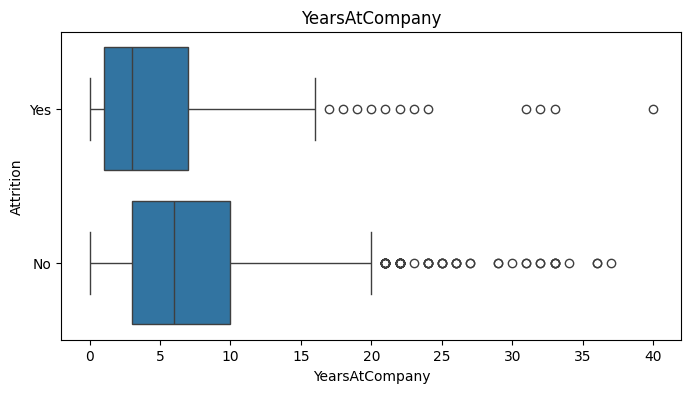

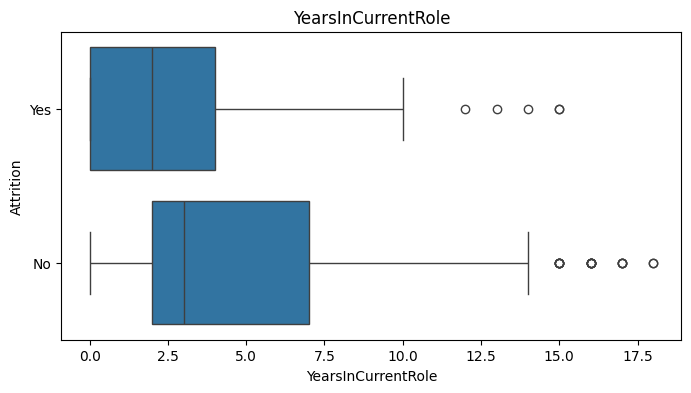

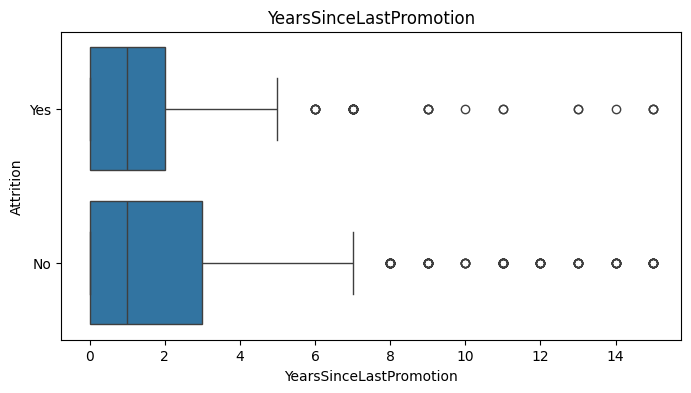

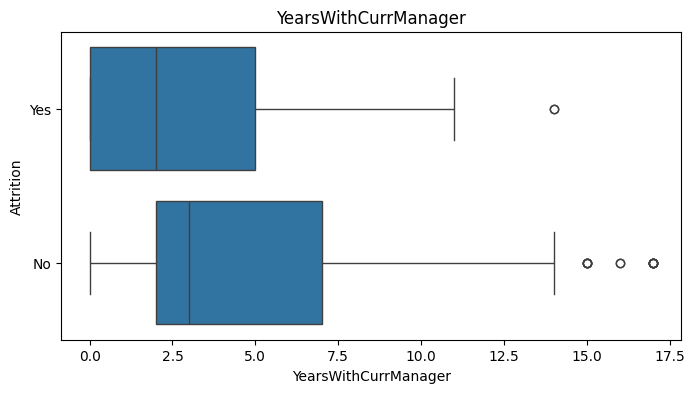

In [ ]:
from pipeline import box_plot_affichage

print("\nGeneration des boxplots pour variables numeriques")

# Colonnes a exclure pour les boxplots
cols_to_drop = [
    'EmployeeNumber', 'EmployeeCount', 'Over18', 'StandardHours',
    'Education', 'EnvironmentSatisfaction', 'JobInvolvement',
    'JobSatisfaction', 'PerformanceRating', 'RelationshipSatisfaction',
    'WorkLifeBalance'
]

df_num = df.drop(cols_to_drop,axis=1)

num_cols = df_num.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Visualisation par boxplots
for col in num_cols:
    box_plot_affichage(df_num, col)


In [ ]:
import numpy as np

print("MATRICE DE CORRÉLATION ")
print("="*60)


# Encoder Attrition pour corrélation
df_num['Attrition_encoded'] = (df_num['Attrition'] == 'Yes').astype(int)

# Sélectionner uniquement les colonnes numériques
num_cols = df_num.select_dtypes(include=[np.number]).columns
corr = df_num[num_cols].corr()['Attrition_encoded'].sort_values(ascending=False)

print("\nTOP 10 CORRÉLATIONS POSITIVES avec Attrition:")
print(corr[:11])

print("\nTOP 10 CORRÉLATIONS NÉGATIVES avec Attrition:")
print(corr[-10:])

MATRICE DE CORRÉLATION 

TOP 10 CORRÉLATIONS POSITIVES avec Attrition:
Attrition_encoded          1.000000
DistanceFromHome           0.077924
NumCompaniesWorked         0.043494
MonthlyRate                0.015170
HourlyRate                -0.006846
PercentSalaryHike         -0.013478
YearsSinceLastPromotion   -0.033019
DailyRate                 -0.056652
TrainingTimesLastYear     -0.059478
YearsAtCompany            -0.134392
StockOptionLevel          -0.137145
Name: Attrition_encoded, dtype: float64
************************************************************

TOP 10 CORRÉLATIONS NÉGATIVES avec Attrition:
DailyRate               -0.056652
TrainingTimesLastYear   -0.059478
YearsAtCompany          -0.134392
StockOptionLevel        -0.137145
YearsWithCurrManager    -0.156199
Age                     -0.159205
MonthlyIncome           -0.159840
YearsInCurrentRole      -0.160545
JobLevel                -0.169105
TotalWorkingYears       -0.171063
Name: Attrition_encoded, dtype: float64


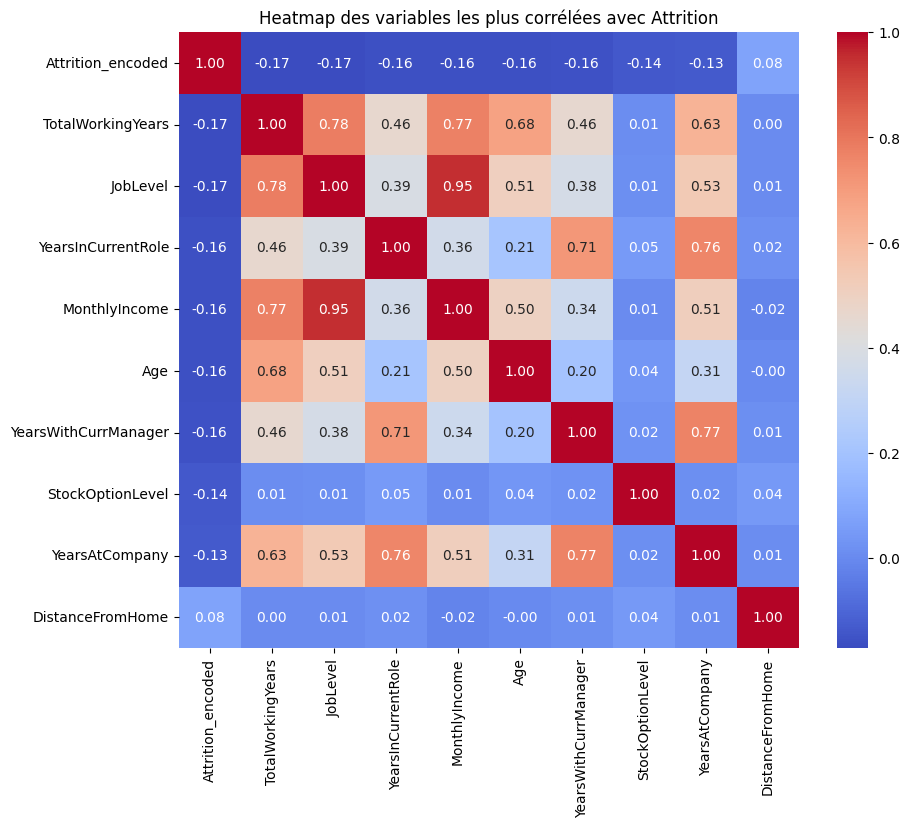

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# corr_series = (
#     df_num[num_cols]
#     .corr()['Attrition_encoded']
#     .sort_values(ascending=False)
# )

top_features = corr.abs().sort_values(ascending=False).head(10).index

plt.figure(figsize=(10,8))
sns.heatmap(
    df_num[top_features].corr(),
    annot=True,
    cmap='coolwarm',
    fmt=".2f"
)
plt.title("Heatmap des variables les plus corrélées avec Attrition")
plt.show()


# PARTIE 4 : Preparation pour le machine learning

In [ ]:
from pipeline import encode_categorical

print("PARTIE 4 : PREPARATION MACHINE LEARNING")
print("="*60)

# Encoder toutes les colonnes catégorielles
df_encoded = encode_categorical(df_copy)
df_encoded.shape

# df_encoded.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,41,1102,1,2,2,94,3,2,4,5993,...,0,0,0,1,0,0,0,1,0,1
1,49,279,8,1,3,61,2,2,2,5130,...,0,0,1,0,0,0,1,0,1,0
2,37,1373,2,2,4,92,2,1,3,2090,...,0,0,0,0,0,0,0,1,0,1
3,33,1392,3,4,4,56,3,1,3,2909,...,0,0,1,0,0,0,1,0,0,1
4,27,591,2,1,1,40,3,1,2,3468,...,0,0,0,0,0,0,1,0,1,0


In [ ]:
from pipeline import select_kbest_columns

print("SELECTION DES MEILLEURES FEATURES (SelectKBest)")
# select kbest avec k = 5 (NOTER BIEN : Il ne fonctionne que sur des données numériques déjà prêtes)
best_features = select_kbest_columns(df_encoded,df)

In [ ]:
# Preparation x et y
X = df_encoded[best_features]
y = (df_copy['Attrition'] == 'Yes').astype(int)


In [ ]:
from sklearn.model_selection import train_test_split

# Separation train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


# PARTIE 5 : Creation du pipeline de preprocessing

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

print("PARTIE 5 : PIPELINE DE PREPROCESSING")
print("="*60)

# Séparer les colonnes numériques et catégorielles
X_num = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
X_cat = X.select_dtypes(include=['uint8', 'object', 'bool']).columns.tolist()

# Pipeline pour les numériques
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Pipeline pour les catégorielles
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, X_num),
        ('cat', cat_pipeline, X_cat)
    ]
)


# PARTIE 6 : Entrainement des modeles

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

print("PARTIE 6 : ENTRAINEMENT DES MODELES")
print("="*60)

# Random Forest avec GridSearch
print("RANDOM FOREST")
print("-" * 60)

pipeline_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

param_grid_rf = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [5, 10]
}

grid_rf = GridSearchCV(
    pipeline_rf, param_grid_rf, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1
)

grid_rf.fit(X_train, y_train)
print(f"\nMeilleurs paramètres : {grid_rf.best_params_}")
print(f"Meilleur score AUC (CV) : {grid_rf.best_score_:.4f}")


In [ ]:
# Logistic Regression avec GridSearch 
print("LOGISTIC REGRESSION")
print("-" * 60)

pipeline_lr = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

param_grid_lr = {
    'classifier__C': [0.1, 1, 10]
}

grid_lr = GridSearchCV(
    pipeline_lr, param_grid_lr, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1
)

grid_lr.fit(X_train, y_train)

print(f"Meilleurs paramètres : {grid_lr.best_params_}")
print(f"Meilleur score AUC (CV) : {grid_lr.best_score_:.4f}")


# PARTIE 7 : Evaluation sur le test

In [ ]:
print("PARTIE 7 : ÉVALUATION SUR LE TEST")
print("="*60)

results = {}

def evaluate_model(model, X_test, y_test, name):
    """Évalue un modèle et stocke les résultats"""
    
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)
    
    results[name] = {'Accuracy': accuracy, 'F1-score': f1, 'AUC': auc}
    
    print(f"{name}:")
    print(f"   Accuracy : {accuracy:.4f}")
    print(f"   F1-score : {f1:.4f}")
    print(f"   AUC-ROC  : {auc:.4f}")

# Évaluer les modèles
best_rf_model = grid_rf.best_estimator_
best_lr_model = grid_lr.best_estimator_

evaluate_model(best_rf_model, X_test, y_test, "Random Forest")
evaluate_model(best_lr_model, X_test, y_test, "Logistic Regression")


# PARTIE 8 : Comparaison finale

In [ ]:
print("PARTIE 8 : COMPARAISON FINALE")
print("="*60)

# Tableau comparatif
df_results = pd.DataFrame(results).T
print("\n", df_results)

# Visualisation
df_results.plot(kind='bar', figsize=(10, 5))
plt.title('Comparaison des performances des modèles')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

# Sélection du meilleur modèle
# utiliser results au lieu de best_rf/best_lr
if results['Random Forest']['F1-score'] > results['Logistic Regression']['F1-score']:
    best_model = best_rf_model
    best_name = "Random Forest"
else:
    best_model = best_lr_model
    best_name = "Logistic Regression"

print(f"\n🏆 MEILLEUR MODÈLE : {best_name}")
print(f"   F1-score : {results[best_name]['F1-score']:.4f}")
print(f"   Accuracy : {results[best_name]['Accuracy']:.4f}")
print(f"   AUC-ROC  : {results[best_name]['AUC']:.4f}")


# PARTIE 9 : Sauvegarde le modele

In [ ]:
# pipeline_rf.fit(X_train, y_train)
# pipeline_lr.fit(X_train, y_train)


,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessor', ...), ('classifier', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transforme

In [ ]:
# from sklearn.model_selection import GridSearchCV

# # GridSearch pour Random Forest

# param_grid_rf = {
#     'classifier__n_estimators': [100, 200],
#     'classifier__max_depth': [5, 10]
# }

# grid_rf = GridSearchCV(
#     pipeline_rf,
#     param_grid_rf,
#     cv=5,
#     scoring='roc_auc'
# )

# grid_rf.fit(X_train, y_train)

# print("Meilleurs paramètres RF :", grid_rf.best_params_)
# print("Meilleur score RF :", grid_rf.best_score_)


Meilleurs paramètres RF : {'classifier__max_depth': 5, 'classifier__n_estimators': 200}
Meilleur score RF : 0.7467410546825454


In [ ]:
# # GridSearch pour Logistic Regression

# param_grid_lr = {
#     'classifier__C': [0.1, 1, 10]
# }

# grid_lr = GridSearchCV(
#     pipeline_lr,
#     param_grid_lr,
#     cv=5,
#     scoring='roc_auc'
# )

# grid_lr.fit(X_train, y_train)

# print("Meilleurs paramètres LR :", grid_lr.best_params_)
# print("Meilleur score LR :", grid_lr.best_score_)


Meilleurs paramètres LR : {'classifier__C': 0.1}
Meilleur score LR : 0.7434097858089309


In [ ]:
# from sklearn.metrics import accuracy_score, f1_score

# results = {}

# # Récupérer les meilleurs modèles
# best_rf = grid_rf.best_estimator_
# best_lr = grid_lr.best_estimator_

# #! Fonction d'évaluation pour classification (version simple)
# def evaluate_model(model, X_test, y_test, name):
#     y_pred = model.predict(X_test)
#     accuracy = accuracy_score(y_test, y_pred)
#     f1 = f1_score(y_test, y_pred)
    
#     results[name] = {'Accuracy': accuracy, 'F1-score': f1}
    
#     print(f"\nTEST ({name}):")
#     print(f"  Accuracy : {accuracy:.3f}")
#     print(f"  F1-score : {f1:.3f}")

# # Évaluer les deux modèles
# evaluate_model(best_rf, X_test, y_test, "Random Forest")
# evaluate_model(best_lr, X_test, y_test, "Logistic Regression")



TEST (Random Forest):
  Accuracy : 0.854
  F1-score : 0.394

TEST (Logistic Regression):
  Accuracy : 0.857
  F1-score : 0.323


In [ ]:
# # Déterminer le meilleur modèle basé sur le F1-score
# if results['Random Forest']['F1-score'] > results['Logistic Regression']['F1-score']:
#     best_modele = grid_rf.best_estimator_
#     nom_meilleur = "Random Forest"
# else:
#     best_modele = grid_lr.best_estimator_
#     nom_meilleur = "Régression Logistique"

# print(f"\nMeilleur modèle : {nom_meilleur}")


Meilleur modèle : Random Forest


In [ ]:
# # Pour sauvegarder le modèle
# import joblib
# joblib.dump(best_modele, 'meilleur_modele_attrition.pkl')

['meilleur_modele_attrition.pkl']